<h1 style='color:rgba(200, 0, 0, 0.85);padding:40px 20px;text-align:center;font-size:45px;font-weight:bold'>Boston House Pricing Prediction 📊</h1>

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Import Required Libraries</center></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Loading Data</center></div>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'> 
<li><strong style='color:green;'>data</strong>: contains the information for various houses</li>
<li><strong style='color:green;'>target</strong>: prices of the house</li>
<li><strong style='color:green;'>feature_names</strong>: names of the features</li>
<li><strong style='color:green;'>DESCR</strong>: describes the dataset</li></h3>

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Data Description</center></div>

In [4]:
## Lets check the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Preparing The Dataset</center></div>

In [7]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Add target varible into the dataframe
df['Price'] = boston.target

In [10]:
# lets check the glimpse of first five rows of our dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# Summary Statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
## Check the missing Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'> There are no missing values in this dataset!! so we can jump directly to EDA.</h3>

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Exploratory Data Analysis</center></div>

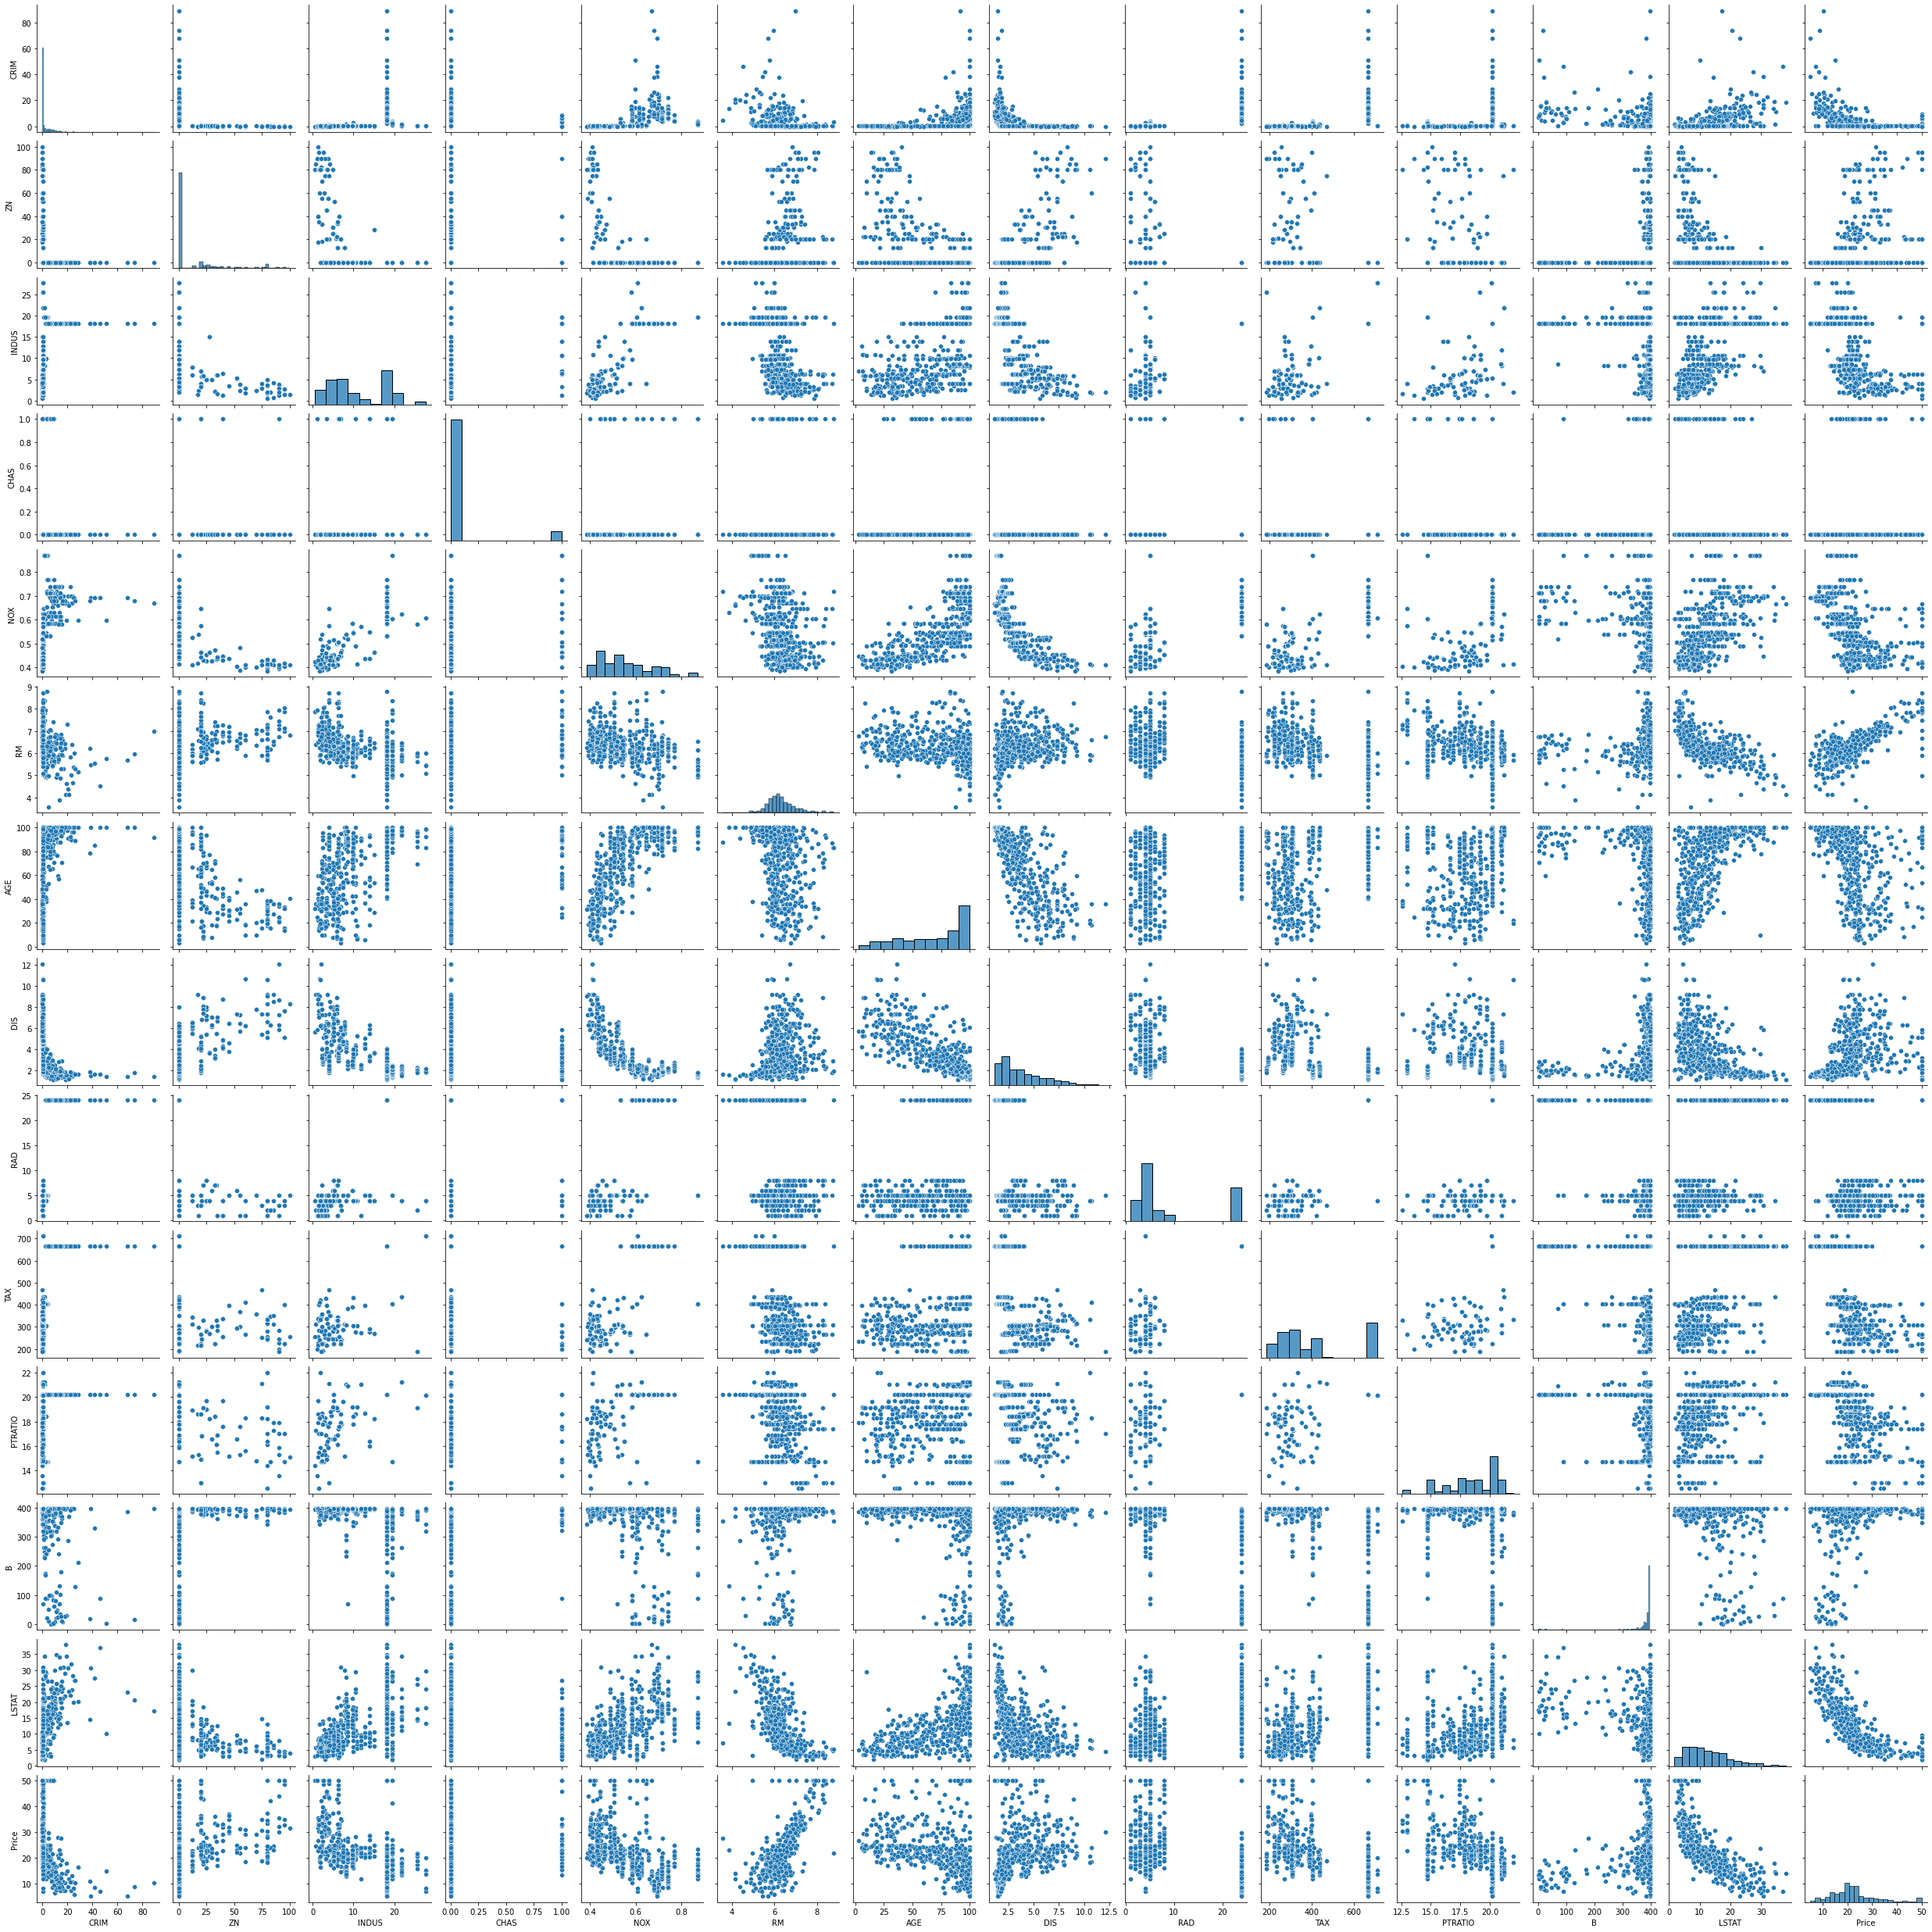

In [14]:
# pairplot to check distribution and correlation of data
sns.pairplot(df)
plt.show()

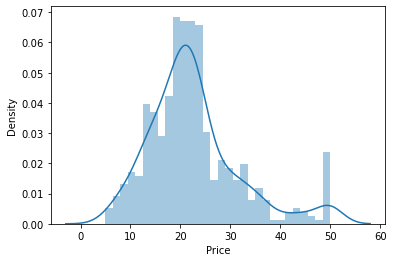

In [15]:
# Distribution of the target variable- Price
sns.distplot(df['Price'], bins=30)
plt.show()

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'> We can see that the values of Price are distributed normally with few outliers.</h3>

In [16]:
# Analyzing The Correlated Features
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


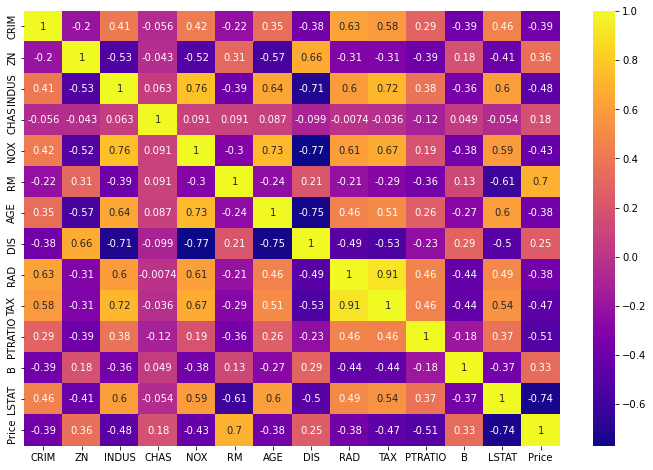

In [17]:
# plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True,cmap='plasma')
plt.show()

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'> Insights:
<li>RM has a strong positive correlation with Price (0.7) where as LSTAT has a high negative correlation with Price(-0.74).</li>
<li><strong style='color:red;'>Multi Co-linearity Alert -</strong> The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same thing for the features DIS and AGE which have a correlation of -0.75.</li></h3>

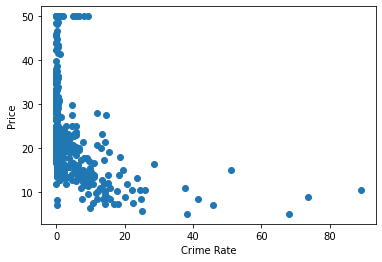

In [18]:
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'>If crime rate is low in a particular area, the demand of the house will be more.</h3>

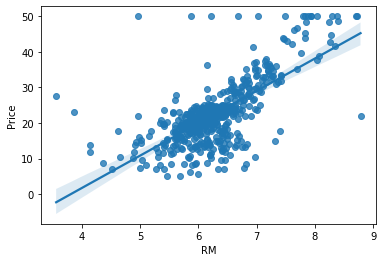

In [19]:
sns.regplot(x="RM",y="Price",data=df)
plt.show()

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'>The prices increase as the value of RM increases linearly.</h3>

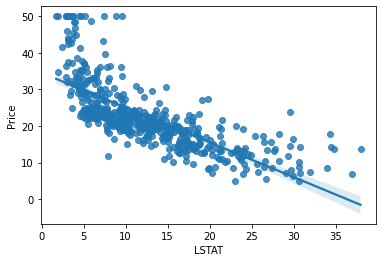

In [20]:
sns.regplot(x="LSTAT",y="Price",data=df)
plt.show()

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:16px;line-height:2'>The prices tend to decrease with an increase in LSTAT.</h3>

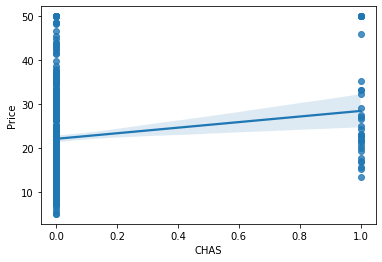

In [21]:
sns.regplot(x="CHAS",y="Price",data=df)
plt.show()

In [22]:
# Independent and Dependent features

X = df.drop('Price', axis=1)
y = df['Price']

In [23]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [26]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95


In [27]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
422,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10


In [28]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Model Training</center></div>

In [32]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [33]:
# Fit the train data
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.95889182  1.00017252  0.33974615  0.69966111 -1.59046522  3.21320732
 -0.33620815 -2.98262529  2.51479964 -2.02836744 -1.95996631  0.96834553
 -3.57366433]


In [35]:
# Intercept
print(regression.intercept_)

23.054455445544555


In [36]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
### Prediction With Test Data
reg_pred = regression.predict(X_test)

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Model Result</center></div>

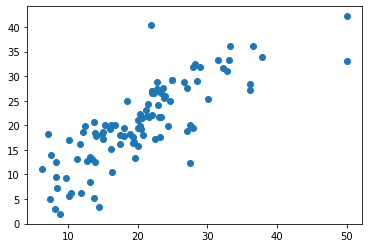

In [38]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)
plt.show()

In [39]:
## Residuals
residuals = y_test - reg_pred

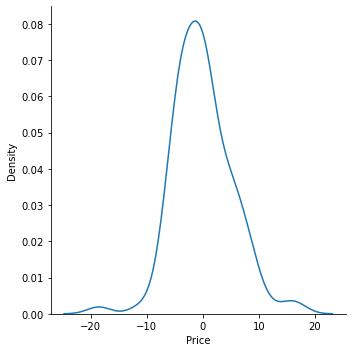

In [40]:
## Plot this residuals 
sns.displot(residuals, kind="kde")
plt.show()

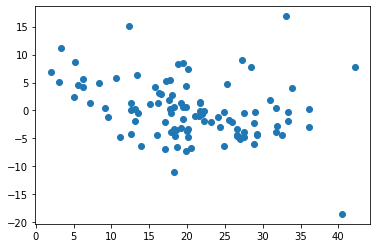

In [41]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)
plt.show()

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Model Evaluation</center></div>

In [42]:
# We will evaluate our model using MSE, MAE, RMSE and R2-score.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.919512841785578
26.98450819701414
5.194661509378079


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6225687597000791


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [44]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5668118719284998

## New Data Prediction

In [45]:
boston.data[1].reshape(1,-1)

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [46]:
##transformation of new data
scaler.transform(boston.data[1].reshape(1,-1))

array([[-0.37080951, -0.51504297, -0.53052443, -0.27288841, -0.68632075,
         0.13546266,  0.42836689,  0.51195696, -0.83606885, -0.95664592,
        -0.26431011,  0.4283113 , -0.43633544]])

In [47]:
regression.predict(scaler.transform(boston.data[1].reshape(1,-1)))

array([24.7095519])

## Pickling The Model file For Deployment

In [48]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [49]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [50]:
## Prediction
pickled_model.predict(scaler.transform(boston.data[1].reshape(1,-1)))

array([24.7095519])

![](http://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg)